In [ ]:
!pip install import_ipynb
!pip install bayesian-optimization
!pip install shap
import import_ipynb
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Intro to DS - Capstone/Code/src')
from utilities import *
from bayes_opt_params import *
from train_model import *

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=157fe84d61679e99280fa089cccad5621c32b359b7a1aad2d21a7eb1b985b5ca
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=9f99aedfee502db697c7f7ef87ad484a7b11cf607ebedd3621591ae2a822db3f
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization
     |████████████████████████████████| 564 kB 7.0 MB/s 
Mounted at /content/gdrive
importing Jupyter notebook from utilities.ipynb
     |████████████████████████████████| 1.0 MB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 45.1 MB/s 
     |████████████████████████████████| 15.4 MB 42.9 MB/s 
importing Jupyter notebook from bayes_opt_params.ipynb
importing J

## 5.1 Load necessary data

In [ ]:
data = pd.read_excel(raw_path + 'default of credit card clients.xlsx', header = 1)
data['SEX'] = (data['SEX'] == 1).astype(float)
data['EDUCATION_1'] = (data['EDUCATION'] == 1).astype(float)
data['EDUCATION_2'] = (data['EDUCATION'] == 2).astype(float)
data['EDUCATION_3'] = (data['EDUCATION'] == 3).astype(float)
data['MARRIAGE_1'] = (data['MARRIAGE'] == 1).astype(float)
data['MARRIAGE_2'] = (data['MARRIAGE'] == 2).astype(float)
data.drop(columns =  ['EDUCATION', 'MARRIAGE'], inplace = True)
data.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2
0,1,20000,0.0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.0,1.0,0.0,1.0,0.0
1,2,120000,0.0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.0,1.0,0.0,0.0,1.0
2,3,90000,0.0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0,1.0,0.0,0.0,1.0
3,4,50000,0.0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0,1.0,0.0,1.0,0.0
4,5,50000,1.0,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0,1.0,0.0,1.0,0.0


## 5.2 Find optimal set of parameters with Bayesian Optimization

In [ ]:
all_params = bayes_parameter_opt_lgb(X=data.drop(columns = ['ID','default payment next month']), 
                                      y=data['default payment next month'], 
                                      init_round=15, 
                                      opt_round=3, 
                                      n_folds=5, 
                                      random_seed=6, 
                                      n_estimators=10000, 
                                      learning_rate=0.01,
                                      save_path = '')

best_params = all_params.max['params']
best_params['metric'] = 'auc'
best_params['objective'] = 'binary'
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
[200]	cv_agg's auc: 0.782934 + 0.00337414
[400]	cv_agg's auc: 0.78503 + 0.00378001
|  1        |  0.7852   |  0.8227   |  0.8796   |  3.644    |  1.054    |  14.2     |  40.98    |  0.06491  |  27.44    |
[200]	cv_agg's auc: 0.780543 + 0.00303114
[400]	cv_agg's auc: 0.783011 + 0.00331709
[600]	cv_agg's auc: 0.784224 + 0.00340856
|  2        |  0.7843   |  0.9412   |  0.2973   |  1.28     |  0.07203  |  6.283    |  18.52    |  0.06444  |  24.67    |
[200]	cv_agg's auc: 0.781383 + 0.0030495
[400]	cv_agg's auc: 0.784557 + 0.00356875
[600]	cv_agg's auc: 0.785051 + 0.00386967
|  3        |  0.7851   |  0.8371   |  0.8338   |  1.355    |  0.8206   |  17.41    |  10.72    |  0.07498  |  15.16    |
[200]	cv_agg's auc: 0.783014 + 0.00271743
[400]	cv_agg's

{'bagging_fraction': 0.971358121572873,
 'feature_fraction': 0.6567649610573583,
 'lambda_l1': 2.7651285211727434,
 'lambda_l2': 2.805707392349148,
 'max_depth': 11,
 'metric': 'auc',
 'min_child_weight': 12.992542951810567,
 'min_split_gain': 0.054149713453980786,
 'num_leaves': 23,
 'objective': 'binary'}

In [ ]:
bag = [all_params.res[i]['params']['bagging_fraction'] for i in range(len(all_params.res))]
featfrac = [all_params.res[i]['params']['feature_fraction'] for i in range(len(all_params.res))]
l1 = [all_params.res[i]['params']['lambda_l1'] for i in range(len(all_params.res))]
l2 = [all_params.res[i]['params']['lambda_l2'] for i in range(len(all_params.res))]
mdepth = [all_params.res[i]['params']['max_depth'] for i in range(len(all_params.res))]
minchild = [all_params.res[i]['params']['min_child_weight'] for i in range(len(all_params.res))]
target = [all_params.res[i]['target'] for i in range(len(all_params.res))]


from google.colab import files

params = pd.DataFrame({'bagging_fraction': bag, 'feature_fraction': featfrac,  'l1': l1, 'l2': l2, 'max_depth': mdepth, 'minchild': minchild, 'target': target})
params.to_csv('params.csv', index = False, sep = ';', decimal = ',')
files.download("params.csv")
params.head(20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,bagging_fraction,feature_fraction,l1,l2,max_depth,minchild,target
0,0.822698,0.879586,3.643673,1.054403,14.198867,40.982207,0.785234
1,0.941206,0.297320,1.279962,0.072034,6.283437,18.519640,0.784348
2,0.837099,0.833755,1.354604,0.820644,17.407365,10.720156,0.785106
3,0.971358,0.656765,2.765129,2.805707,11.664106,12.992543,0.785670
4,0.802120,0.807041,3.282053,2.826768,14.684289,17.024470,0.785645
5,0.909377,0.306936,0.873182,1.082131,6.822369,22.508539,0.784181
6,0.829113,0.511404,2.638259,0.915728,7.075772,31.861019,0.785558
7,0.877261,0.167778,2.809996,1.944215,13.605141,13.515926,0.776098
8,0.976041,0.727007,1.262387,2.781272,10.781758,21.971810,0.785433
9,0.954892,0.803239,2.407412,0.908702,10.758062,28.765978,0.785329


## 5.3 Execute LightGBM with previously found parameters

####################     training with  27000      ####################
####################     validating with  3000      ####################
[1]	training's auc: 0.771609	valid_1's auc: 0.760514
Training until validation scores don't improve for 20 rounds.
[2]	training's auc: 0.782168	valid_1's auc: 0.76283
[3]	training's auc: 0.784527	valid_1's auc: 0.766527
[4]	training's auc: 0.785949	valid_1's auc: 0.770061
[5]	training's auc: 0.787443	valid_1's auc: 0.770423
[6]	training's auc: 0.788563	valid_1's auc: 0.773195
[7]	training's auc: 0.789996	valid_1's auc: 0.774053
[8]	training's auc: 0.790828	valid_1's auc: 0.774073
[9]	training's auc: 0.79126	valid_1's auc: 0.773479
[10]	training's auc: 0.792082	valid_1's auc: 0.774446
[11]	training's auc: 0.793233	valid_1's auc: 0.77596
[12]	training's auc: 0.793779	valid_1's auc: 0.776593
[13]	training's auc: 0.794424	valid_1's auc: 0.776995
[14]	training's auc: 0.795534	valid_1's auc: 0.777494
[15]	training's auc: 0.796099	valid_1's auc: 0.77

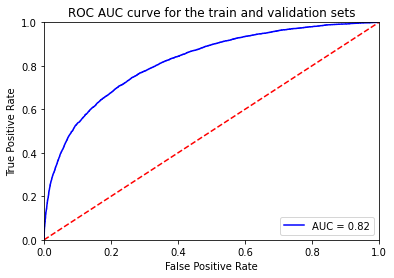

In [ ]:
model = train_model(X=data.drop(columns = 'ID'), 
                    target_name = 'default payment next month', 
                    split = 'in_sample', 
                    model_type = 'lgb', 
                    params = best_params, 
                    objective = 'binary', 
                    metric = 'auc', 
                    save_path = '')

## 5.4 Generate model report - feature contributions and decile analysis

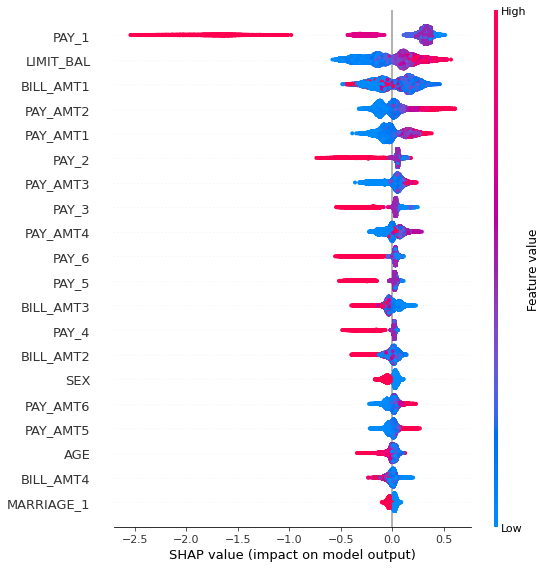

In [ ]:
feat_imp, decile = model_report(model=model, 
                                X=data.drop(columns='ID'), 
                                target_name = 'default payment next month', 
                                model_type = 'lgb', 
                                save_path = '')

In [ ]:
feat_imp['relative_gain'] = feat_imp['gain'] / feat_imp['gain'].sum()
feat_imp.to_csv('feat_imp.csv', index = False, sep = ';', decimal = ',')
files.download("feat_imp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
decile

,Decile,# observations,Average target,Average score,PAY_1,PAY_2,BILL_AMT1,LIMIT_BAL,PAY_AMT2,PAY_AMT1,PAY_AMT3,PAY_3,PAY_AMT4,PAY_5,BILL_AMT2,PAY_6,PAY_4,PAY_AMT6,BILL_AMT3,AGE,PAY_AMT5,BILL_AMT5,BILL_AMT4,BILL_AMT6,SEX,MARRIAGE_2,MARRIAGE_1,EDUCATION_2,EDUCATION_1,EDUCATION_3
0,Decile 1,3000,0.020333,0.041749,-0.502333,-0.474000,53278.934667,315050.000000,18400.842333,15475.985000,15012.757667,-0.483333,12912.378333,-0.442333,52687.631333,-0.468000,-0.458667,14150.367000,54516.101000,35.008667,12710.551333,50996.842333,53479.172333,49317.713667,0.319667,0.593667,0.402333,0.363333,0.527667,0.093333
1,Decile 2,3000,0.042333,0.068041,-0.419333,-0.426667,66616.700333,234670.000000,10893.375333,9984.027667,8514.647667,-0.431333,7767.346667,-0.413333,62903.529000,-0.434000,-0.414333,7760.662333,61327.301000,35.100333,7534.002667,54123.465667,57541.736000,52521.792667,0.357333,0.547333,0.444000,0.406667,0.440667,0.128000
2,Decile 3,3000,0.063000,0.090766,-0.451333,-0.464667,68591.371333,187576.666667,6811.909333,7145.855667,6875.456667,-0.464667,6147.804333,-0.483667,64473.363333,-0.494333,-0.479000,6773.147333,60408.372667,34.983000,5679.929000,52709.985000,56150.163000,51174.732667,0.330667,0.563667,0.424333,0.441667,0.379333,0.155333
3,Decile 4,3000,0.089667,0.111121,-0.408667,-0.453667,69483.499000,172490.000000,6084.862667,5660.279000,4848.269667,-0.458667,5542.214667,-0.475000,63739.551333,-0.480000,-0.478333,5428.409000,59481.994667,35.401333,5376.487000,48878.856333,52945.552667,47515.901000,0.378667,0.571333,0.417333,0.469667,0.356667,0.158000
4,Decile 5,3000,0.128667,0.133396,-0.337000,-0.432000,57282.150667,146426.666667,4392.539667,4773.423667,4083.253000,-0.418667,4016.677000,-0.463667,54357.481333,-0.461000,-0.448333,4083.078000,49987.244333,35.550000,4066.726000,38612.238667,43048.261333,37000.756667,0.391333,0.555333,0.429000,0.482667,0.313667,0.181333
5,Decile 6,3000,0.161000,0.160120,-0.344333,-0.492333,41453.540667,133650.000000,3144.736333,3587.008333,3464.405333,-0.438333,2812.555667,-0.503333,39813.621333,-0.487000,-0.491000,3465.607000,36802.123000,35.970667,3476.532000,28092.752667,31406.798667,26915.395000,0.395000,0.493333,0.491667,0.501333,0.310333,0.173000
6,Decile 7,3000,0.223333,0.198864,-0.352000,-0.519000,36631.437000,131037.893333,2583.294667,3431.392667,2768.325000,-0.459667,2716.342000,-0.544333,36119.516667,-0.510333,-0.509333,3095.985333,33646.905000,35.460000,2202.860000,27074.615000,29933.436333,24729.450000,0.434000,0.496000,0.489667,0.513667,0.305667,0.165667
7,Decile 8,3000,0.288667,0.272574,-0.119000,-0.460333,25836.417333,135776.666667,2106.836667,1988.994667,1732.880333,-0.416000,2012.805333,-0.563333,25323.879333,-0.563667,-0.440333,2073.098000,24574.207667,35.420333,1948.195000,21709.563000,23026.434000,20960.046000,0.425667,0.507000,0.477667,0.468333,0.356000,0.164000
8,Decile 9,3000,0.460333,0.432543,0.617667,0.787000,30486.670000,118246.666667,2214.568333,1717.044000,2001.491000,0.556000,1683.348333,0.135000,30334.617000,-0.022333,0.310667,2007.265000,29602.484667,36.519667,2232.680000,26297.539667,28226.670000,25805.285000,0.487667,0.500667,0.482000,0.481000,0.303000,0.211667
9,Decile 10,3000,0.734667,0.703133,2.149333,1.598000,62572.588000,99918.666667,2578.669667,2871.794333,2955.328667,1.352667,2649.296333,1.092000,62037.561000,1.009667,1.202000,3317.406667,59784.814000,35.441000,2765.913333,54618.151333,56871.265333,52776.531333,0.442667,0.493000,0.495000,0.548333,0.235333,0.208667
